[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Total Loss')]

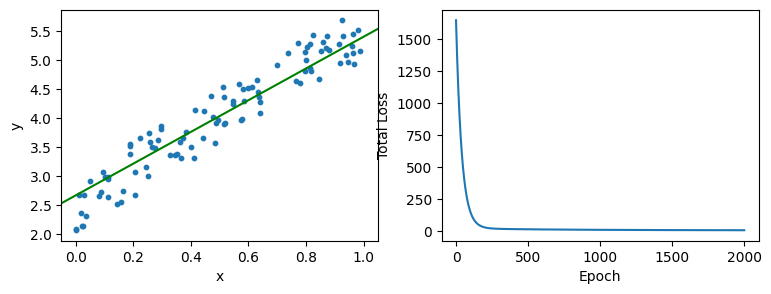

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, in_size):
        self.epochs = 2000
        # initialize weigth and bias
        self.weigth = np.zeros(in_size)
        self.bias = 0
    
    def learn(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(self.x)
        
        costs = []
        for epoch in range(0, self.epochs):
            self._update_parameters()
            if epoch % 1 == 0:
                costs.append([epoch, self._cost()])
        return np.array(costs)

    def predict(self, x):
        return np.sum(x * self.weigth, axis=1) + self.bias

    def _update_parameters(self, alpha=0.005):
        del_w, del_b = self._gradient()
        self.weigth -= del_w * alpha
        self.bias -= del_b * alpha

    def _diff(self):
        yT = np.repeat(self.y, self.x.shape[1]).reshape(self.x.shape)
        return (self.weigth * self.x + self.bias) - yT

    def _cost(self):
        return np.sum(self._diff() ** 2)
    
    def _gradient(self):
        diff = self._diff()
        del_w = 1/self.n * 2 * np.sum(self.x * diff, axis=0) 
        del_b = 1/self.n * 2 * np.sum(diff)

        return del_w, del_b

# generate random data-set
np.random.seed(5)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# learn
lr = LinearRegression(x.ndim-1)
costs = lr.learn(x, y)

# plot
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].scatter(x,y,s=10)
axs[0].set(xlabel='x', ylabel='y')

line = lr.predict([[0], [1]])
axs[0].axline((0, line[0]), (1, line[1]), color="green")

axs[1].plot(costs[:, 0], costs[:, 1])
axs[1].set(xlabel='Epoch', ylabel='Total Loss')
